# 刷分神器，使用Hyperopt对lightgbm进行自动化调参！

Hyperopt 是最受欢迎的调参工具包，github star数量超过5k，在kaggle天池等比赛中经常出现它的身影。

它的主要功能是应用 随机搜索，模拟退火 以及贝叶斯优化 等最优化算法，在不可解析不可求导的参数空间中求解函数的最小值。

下面我们首先看看它的一些基本范例用法，然后再使用它来实现对lightgbm模型的自动化调参！


In [ ]:
!pip install hyperopt 

### 一，单一参数空间

单一参数可以直接用 hyperopt.hp 中的相关参数类型指定搜索范围。

100%|██████████| 1000/1000 [00:08<00:00, 124.84trial/s, best loss: 1.986234184967726e-07]
best_params =  0.9995543281268727


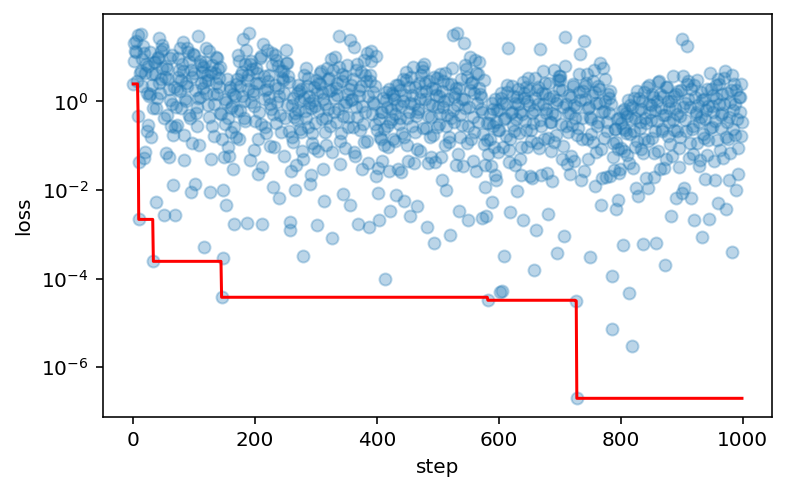

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from hyperopt import fmin, tpe, hp, Trials,space_eval

# 1，定义目标函数
def loss(x):
    return (x-1)**2 
  
# 2，定义超参空间

#常用的搜索空间
#hp.choice 离散值
#hp.uniform 均匀分布
#hp.normal 正态分布
spaces = hp.uniform("x",-5.0,5.0)

# 3，执行搜索过程
# hyperopt支持如下搜索算法
#随机搜索(hyperopt.rand.suggest)
#模拟退火(hyperopt.anneal.suggest)
#TPE算法（hyperopt.tpe.suggest，贝叶斯优化，算法全称为Tree-structured Parzen Estimator Approach）
trials = Trials()
best = fmin(fn=loss, space=spaces, algo=tpe.suggest, max_evals=1000,trials=trials)
   
# 4，获取最优参数

best_params = space_eval(spaces,best)
print("best_params = ",best_params)


# 5，绘制搜索过程
losses = [x["result"]["loss"] for x in trials.trials]
minlosses = [np.min(losses[0:i+1]) for i in range(len(losses))] 
steps = range(len(losses))

fig,ax = plt.subplots(figsize=(6,3.7),dpi=144)
ax.scatter(x = steps, y = losses, alpha = 0.3)
ax.plot(steps,minlosses,color = "red",axes = ax)
plt.xlabel("step")
plt.ylabel("loss")
plt.yscale("log")


### 二，网格参数空间

多个参数可以用字典表述成网格参数空间形式。

100%|██████████| 1000/1000 [00:05<00:00, 196.72trial/s, best loss: 1.0002178672135031]
best_params =  {'x': -0.010021417278592508, 'y': 1.0000587174807445}


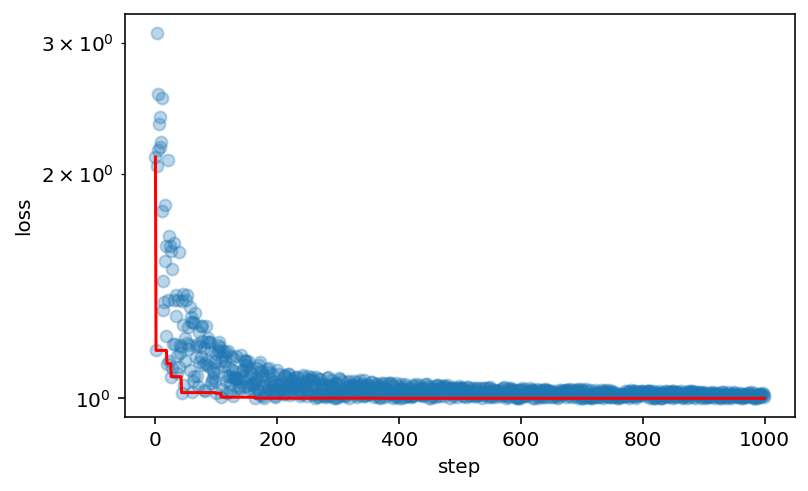

In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
from hyperopt import fmin, tpe, hp,anneal, Trials,space_eval

# 1，定义目标函数
def loss(params):
    x,y = params["x"],params["y"]
    return x**2+y**2

    
# 2，定义超参空间
hspaces = {"x":hp.uniform("x",-1.0,1.0),
          "y":hp.uniform("y",1.0,2.0)}


# 3，执行搜索过程
# hyperopt支持如下搜索算法
#随机搜索(hyperopt.rand.suggest)
#模拟退火(hyperopt.anneal.suggest)
#TPE算法（hyperopt.tpe.suggest，贝叶斯优化，算法全称为Tree-structured Parzen Estimator Approach）
trials = Trials()
best = fmin(fn=loss, space=hspaces, algo=anneal.suggest, max_evals=1000,trials=trials)
   
# 4，获取最优参数
best_params = space_eval(hspaces,best)
print("best_params = ",best_params)


# 5，绘制搜索过程
losses = [x["result"]["loss"] for x in trials.trials]
minlosses = [np.min(losses[0:i+1]) for i in range(len(losses))] 
steps = range(len(losses))

fig,ax = plt.subplots(figsize=(6,3.7),dpi=144)
ax.scatter(x = steps, y = losses, alpha = 0.3)
ax.plot(steps,minlosses,color = "red",axes = ax)
plt.xlabel("step")
plt.ylabel("loss")
plt.yscale("log")


### 三，树形参数空间

有时候，后面的参数依赖于之前一些参数的取值，可以用hyperopt.hp.choice表述成树形参数空间。


100%|██████████| 1000/1000 [00:20<00:00, 49.38trial/s, best loss: 2.1474036379445976e-09]
best_params =  ('sin', {'x': 3.141546313503049})


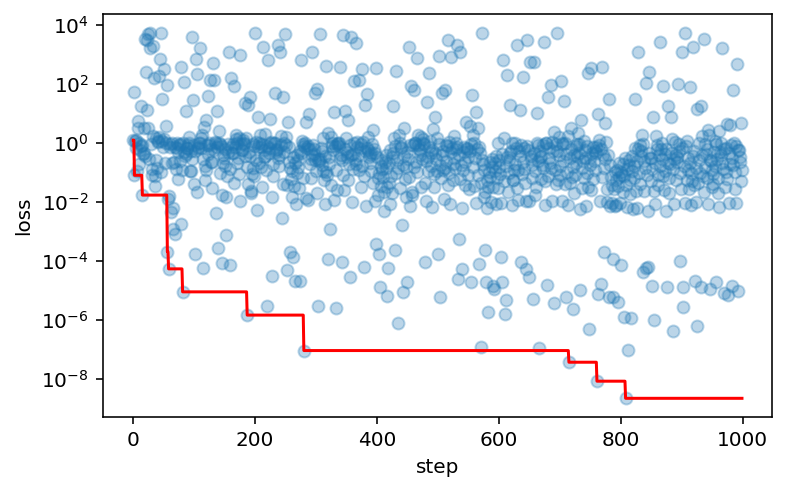

In [3]:

import math 
from hyperopt import fmin, tpe, hp, Trials,space_eval

# 1，定义目标函数
def loss(params):
    f = params[0]
    if f=="sin":
        x = params[1]["x"]
        return math.sin(x)**2
    elif f=="cos":
        x = params[1]["x"]
        y = params[1]["y"]
        return math.cos(x)**2+y**2
    elif f=="sinh":
        x = params[1]["x"]
        return math.sinh(x)**2
    else:
        assert f=="cosh"
        x = params[1]["x"]
        y = params[1]["y"]
        return math.cosh(x)**2+y**2
    
# 2，定义超参空间
spaces = hp.choice("f",
        [("sin",{"x":hp.uniform("x1",-math.pi/2,math.pi)}),
        ("cos",{"x":hp.uniform("x2",-math.pi/2,math.pi),"y":hp.uniform("y2",-1,1)}),
        ("sinh",{"x":hp.uniform("x3",-5,5)}),
        ("cosh",{"x":hp.uniform("x4",-5,5),"y":hp.uniform("y4",-1,1)})])

# 3，执行搜索过程

# hyperopt支持如下搜索算法
#随机搜索(hyperopt.rand.suggest)
#模拟退火(hyperopt.anneal.suggest)
#TPE算法（hyperopt.tpe.suggest，贝叶斯优化，算法全称为Tree-structured Parzen Estimator Approach）
trials = Trials()
best = fmin(fn=loss, space=spaces, algo=tpe.suggest, max_evals=1000,trials=trials)
   
# 4，获取最优参数
best_params = space_eval(spaces,best)
print("best_params = ",best_params)

# 5，绘制搜索过程
losses = [x["result"]["loss"] for x in trials.trials]
minlosses = [np.min(losses[0:i+1]) for i in range(len(losses))] 
steps = range(len(losses))

fig,ax = plt.subplots(figsize=(6,3.7),dpi=144)
ax.scatter(x = steps, y = losses, alpha = 0.3)
ax.plot(steps,minlosses,color = "red",axes = ax)
plt.xlabel("step")
plt.ylabel("loss")
plt.yscale("log")



### 四，LightGBM手动化调参

下面我们将应用hyperopt来对lightgbm模型进行超参数调参。我们使用的是网格参数空间。

作为对比，我们先看看手动调9组参数的结果。

手动调参的范例代码如下。

我们分别尝试以下9组参数：

最优超参数组合如下

```python
learning_rate = 0.05 # 分别尝试(0.1,0.05,0.01)
boosting_type = 'gbdt' # 分别尝试('gbdt','rf','dart')
num_leaves = 63 # 分别尝试(15,31,63)
```

最优验证集得分为 f1_score=0.96591，看起来还不错！😝

```
train f1_score: 0.99448 
valid f1_score: 0.96591
```


================================================================================2021-07-31 13:49:31
step1: reading data......



================================================================================2021-07-31 13:49:31
step2: setting parameters......



================================================================================2021-07-31 13:49:31
step3: training model......


[1]	train's auc: 0.986704	validate's auc: 0.954406
Training until validation scores don't improve for 50 rounds
[2]	train's auc: 0.988704	validate's auc: 0.957874
[3]	train's auc: 0.989954	validate's auc: 0.95257
[4]	train's auc: 0.990049	validate's auc: 0.952468
[5]	train's auc: 0.991287	validate's auc: 0.957262
[6]	train's auc: 0.993739	validate's auc: 0.962872
[7]	train's auc: 0.994608	validate's auc: 0.9643
[8]	train's auc: 0.994965	validate's auc: 0.965422
[9]	train's auc: 0.995274	validate's auc: 0.966442
[10]	train's auc: 0.995108	validate's auc: 0.968278
[11]	train's auc: 0.995989	validate'

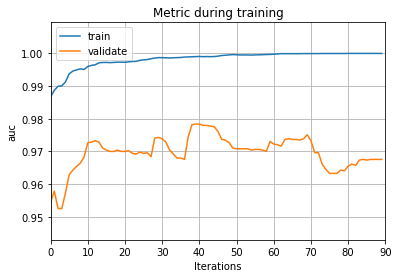

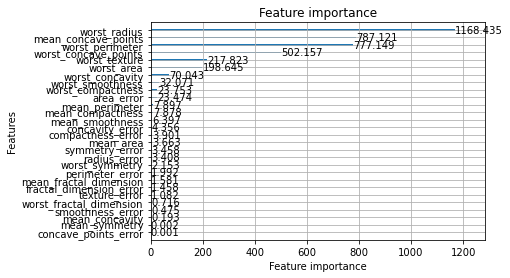

In [4]:
import datetime
import numpy as np
import pandas as pd
import lightgbm as lgb
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
import warnings 
warnings.filterwarnings('ignore')

def printlog(info):
    nowtime = datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S')
    print("\n"+"=========="*8 + "%s"%nowtime)
    print(info+'...\n\n')

#================================================================================
# 一，读取数据
#================================================================================
printlog("step1: reading data...")

# 读取dftrain,dftest
breast = datasets.load_breast_cancer()
df = pd.DataFrame(breast.data,columns = [x.replace(' ','_') for x in breast.feature_names])
df['label'] = breast.target
df['mean_radius'] = df['mean_radius'].apply(lambda x:int(x))
df['mean_texture'] = df['mean_texture'].apply(lambda x:int(x))
dftrain,dftest = train_test_split(df)

categorical_features = ['mean_radius','mean_texture']
lgb_train = lgb.Dataset(dftrain.drop(['label'],axis = 1),label=dftrain['label'],
                        categorical_feature = categorical_features)

lgb_valid = lgb.Dataset(dftest.drop(['label'],axis = 1),label=dftest['label'],
                        categorical_feature = categorical_features,
                        reference=lgb_train)

#================================================================================
# 二，设置参数
#================================================================================
printlog("step2: setting parameters...")
                               
boost_round = 100                   
early_stop_rounds = 50

params = {
    'learning_rate': 0.05,
    'boosting_type': 'gbdt', #'dart','rf' 
    'num_leaves':63,
    'objective':'binary',
    'metric': ['auc'],
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': -1
}

#================================================================================
# 三，训练模型
#================================================================================
printlog("step3: training model...")


results = {}
gbm = lgb.train(params,
                lgb_train,
                num_boost_round= boost_round,
                valid_sets=(lgb_valid, lgb_train),
                valid_names=('validate','train'),
                early_stopping_rounds = early_stop_rounds,
                evals_result= results,
                verbose_eval = True)

#================================================================================
# 四，评估模型
#================================================================================
printlog("step4: evaluating model ...")

y_pred_train = gbm.predict(dftrain.drop('label',axis = 1), num_iteration=gbm.best_iteration)
y_pred_test = gbm.predict(dftest.drop('label',axis = 1), num_iteration=gbm.best_iteration)

train_score = f1_score(dftrain['label'],y_pred_train>0.5)
val_score = f1_score(dftest['label'],y_pred_test>0.5)

print('train f1_score: {:.5} '.format(train_score))
print('valid f1_score: {:.5} \n'.format(val_score))

lgb.plot_metric(results)
lgb.plot_importance(gbm,importance_type = "gain")

#================================================================================
# 五，保存模型
#================================================================================
printlog("step5: saving model ...")


model_dir = "gbm.model"
print("model_dir: %s"%model_dir)
gbm.save_model("gbm.model",num_iteration=gbm.best_iteration)
printlog("task end...")

###
##
#

### 四，LightGBM自动化调参

下面我们利用hyperopt对lightgbm进行自动化调参，我们一共尝试一百个超参组合。

以下程序用时较长，可以根据情况增加或者减少尝试的超参数组合个数。

注意我们的num_boost_round是通过early_stop自适应的，无需调整。



================================================================================2021-07-31 13:51:24
step1: reading data......



================================================================================2021-07-31 13:51:24
step2: searching parameters......


100%|██████████| 100/100 [02:07<00:00,  1.27s/trial, best loss: -0.989247311827957]
best_params =  {'boosting_type': 'dart', 'learning_rate': 0.013714190659920054, 'num_leaves': 74}

================================================================================2021-07-31 13:53:32
step3: training model......


[1]	train's auc: 0.992008	validate's auc: 0.958227
[2]	train's auc: 0.989699	validate's auc: 0.966432
[3]	train's auc: 0.989664	validate's auc: 0.955563
[4]	train's auc: 0.991832	validate's auc: 0.948956
[5]	train's auc: 0.992429	validate's auc: 0.966326
[6]	train's auc: 0.998617	validate's auc: 0.967285
[7]	train's auc: 0.998805	validate's auc: 0.968137
[8]	train's auc: 0.998898	validate's auc: 0.967924
[9]	train's a

[170]	train's auc: 0.999836	validate's auc: 0.989344
[171]	train's auc: 0.999836	validate's auc: 0.98977
[172]	train's auc: 0.999836	validate's auc: 0.98977
[173]	train's auc: 0.999836	validate's auc: 0.989983
[174]	train's auc: 0.999859	validate's auc: 0.990196
[175]	train's auc: 0.999859	validate's auc: 0.990835
[176]	train's auc: 0.999859	validate's auc: 0.990835
[177]	train's auc: 0.999859	validate's auc: 0.990835
[178]	train's auc: 0.999859	validate's auc: 0.990835
[179]	train's auc: 0.999859	validate's auc: 0.991475
[180]	train's auc: 0.999859	validate's auc: 0.991475
[181]	train's auc: 0.999859	validate's auc: 0.991049
[182]	train's auc: 0.999883	validate's auc: 0.990835
[183]	train's auc: 0.999883	validate's auc: 0.991049
[184]	train's auc: 0.999883	validate's auc: 0.990622
[185]	train's auc: 0.999883	validate's auc: 0.990409
[186]	train's auc: 0.999906	validate's auc: 0.990196
[187]	train's auc: 0.999906	validate's auc: 0.989983
[188]	train's auc: 0.999906	validate's auc: 0.98

[382]	train's auc: 0.999977	validate's auc: 0.991262
[383]	train's auc: 0.999977	validate's auc: 0.991262
[384]	train's auc: 0.999977	validate's auc: 0.991262
[385]	train's auc: 0.999977	validate's auc: 0.991262
[386]	train's auc: 1	validate's auc: 0.991262
[387]	train's auc: 1	validate's auc: 0.991262
[388]	train's auc: 1	validate's auc: 0.991262
[389]	train's auc: 1	validate's auc: 0.991262
[390]	train's auc: 1	validate's auc: 0.991262
[391]	train's auc: 1	validate's auc: 0.991049
[392]	train's auc: 1	validate's auc: 0.991049
[393]	train's auc: 1	validate's auc: 0.990835
[394]	train's auc: 1	validate's auc: 0.990835
[395]	train's auc: 1	validate's auc: 0.990835
[396]	train's auc: 1	validate's auc: 0.990835
[397]	train's auc: 1	validate's auc: 0.990622
[398]	train's auc: 1	validate's auc: 0.990622
[399]	train's auc: 1	validate's auc: 0.990622
[400]	train's auc: 1	validate's auc: 0.990622
[401]	train's auc: 1	validate's auc: 0.990622
[402]	train's auc: 1	validate's auc: 0.990622
[403]	

[594]	train's auc: 1	validate's auc: 0.992967
[595]	train's auc: 1	validate's auc: 0.992967
[596]	train's auc: 1	validate's auc: 0.992967
[597]	train's auc: 1	validate's auc: 0.992967
[598]	train's auc: 1	validate's auc: 0.992967
[599]	train's auc: 1	validate's auc: 0.992967
[600]	train's auc: 1	validate's auc: 0.992967
[601]	train's auc: 1	validate's auc: 0.992967
[602]	train's auc: 1	validate's auc: 0.992967
[603]	train's auc: 1	validate's auc: 0.992967
[604]	train's auc: 1	validate's auc: 0.992967
[605]	train's auc: 1	validate's auc: 0.992967
[606]	train's auc: 1	validate's auc: 0.992967
[607]	train's auc: 1	validate's auc: 0.992967
[608]	train's auc: 1	validate's auc: 0.992967
[609]	train's auc: 1	validate's auc: 0.992967
[610]	train's auc: 1	validate's auc: 0.992967
[611]	train's auc: 1	validate's auc: 0.992967
[612]	train's auc: 1	validate's auc: 0.992967
[613]	train's auc: 1	validate's auc: 0.992967
[614]	train's auc: 1	validate's auc: 0.992967
[615]	train's auc: 1	validate's au

[786]	train's auc: 1	validate's auc: 0.993606
[787]	train's auc: 1	validate's auc: 0.993606
[788]	train's auc: 1	validate's auc: 0.993606
[789]	train's auc: 1	validate's auc: 0.993606
[790]	train's auc: 1	validate's auc: 0.993606
[791]	train's auc: 1	validate's auc: 0.993606
[792]	train's auc: 1	validate's auc: 0.993606
[793]	train's auc: 1	validate's auc: 0.993606
[794]	train's auc: 1	validate's auc: 0.993606
[795]	train's auc: 1	validate's auc: 0.993606
[796]	train's auc: 1	validate's auc: 0.993606
[797]	train's auc: 1	validate's auc: 0.993606
[798]	train's auc: 1	validate's auc: 0.993606
[799]	train's auc: 1	validate's auc: 0.993606
[800]	train's auc: 1	validate's auc: 0.993606
[801]	train's auc: 1	validate's auc: 0.993606
[802]	train's auc: 1	validate's auc: 0.993606
[803]	train's auc: 1	validate's auc: 0.993606
[804]	train's auc: 1	validate's auc: 0.993606
[805]	train's auc: 1	validate's auc: 0.993606
[806]	train's auc: 1	validate's auc: 0.993606
[807]	train's auc: 1	validate's au

[978]	train's auc: 1	validate's auc: 0.993819
[979]	train's auc: 1	validate's auc: 0.993819
[980]	train's auc: 1	validate's auc: 0.993819
[981]	train's auc: 1	validate's auc: 0.993819
[982]	train's auc: 1	validate's auc: 0.993819
[983]	train's auc: 1	validate's auc: 0.993819
[984]	train's auc: 1	validate's auc: 0.993819
[985]	train's auc: 1	validate's auc: 0.993819
[986]	train's auc: 1	validate's auc: 0.993819
[987]	train's auc: 1	validate's auc: 0.993819
[988]	train's auc: 1	validate's auc: 0.993819
[989]	train's auc: 1	validate's auc: 0.993819
[990]	train's auc: 1	validate's auc: 0.993819
[991]	train's auc: 1	validate's auc: 0.993819
[992]	train's auc: 1	validate's auc: 0.993819
[993]	train's auc: 1	validate's auc: 0.993819
[994]	train's auc: 1	validate's auc: 0.993819
[995]	train's auc: 1	validate's auc: 0.993819
[996]	train's auc: 1	validate's auc: 0.993819
[997]	train's auc: 1	validate's auc: 0.993819
[998]	train's auc: 1	validate's auc: 0.993819
[999]	train's auc: 1	validate's au

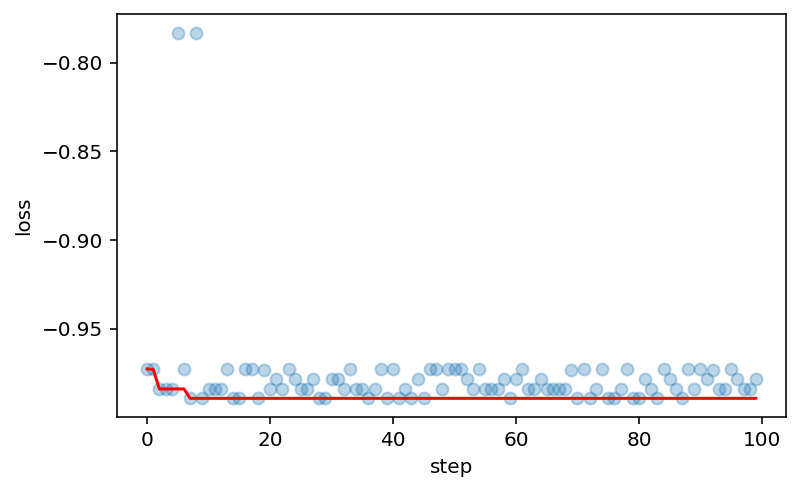

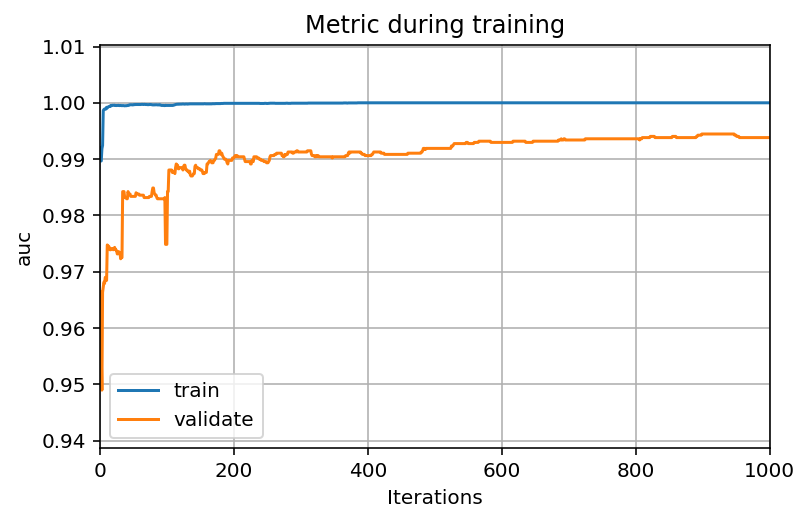

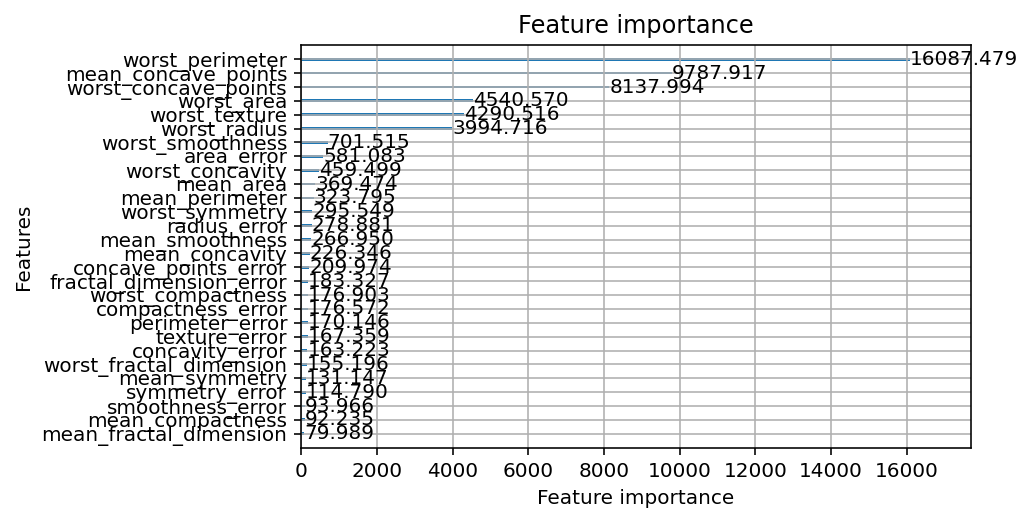

In [6]:
import datetime
import numpy as np
import pandas as pd
import lightgbm as lgb
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score
import matplotlib.pyplot as plt 
from hyperopt import fmin,hp,Trials,space_eval,rand,tpe,anneal
import warnings 
warnings.filterwarnings('ignore')

def printlog(info):
    nowtime = datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S')
    print("\n"+"=========="*8 + "%s"%nowtime)
    print(info+'...\n\n')

#================================================================================
# 一，读取数据
#================================================================================
printlog("step1: reading data...")

# 读取dftrain,dftest
breast = datasets.load_breast_cancer()
df = pd.DataFrame(breast.data,columns = [x.replace(' ','_') for x in breast.feature_names])
df['label'] = breast.target
df['mean_radius'] = df['mean_radius'].apply(lambda x:int(x))
df['mean_texture'] = df['mean_texture'].apply(lambda x:int(x))
dftrain,dftest = train_test_split(df)

categorical_features = ['mean_radius','mean_texture']
lgb_train = lgb.Dataset(dftrain.drop(['label'],axis = 1),label=dftrain['label'],
                        categorical_feature = categorical_features,free_raw_data=False)

lgb_valid = lgb.Dataset(dftest.drop(['label'],axis = 1),label=dftest['label'],
                        categorical_feature = categorical_features,
                        reference=lgb_train,free_raw_data=False)

#================================================================================
# 二，搜索超参
#================================================================================
printlog("step2: searching parameters...")

boost_round = 1000                   
early_stop_rounds = 50

params = {
    'learning_rate': 0.1,
    'boosting_type': 'gbdt',#'dart','rf'  
    'objective':'binary',
    'metric': ['auc'],
    'num_leaves': 31,
    'max_depth':  6,
    'min_data_in_leaf': 5,  
    'min_gain_to_split': 0,
    'reg_alpha':0,
    'reg_lambda':0,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'feature_pre_filter':False,
    'verbose': -1
}

# 1，定义目标函数
def loss(config):
    params.update(config)
    gbm = lgb.train(params,
                    lgb_train,
                    num_boost_round= boost_round,
                    valid_sets=(lgb_valid, lgb_train),
                    valid_names=('validate','train'),
                    early_stopping_rounds = early_stop_rounds,
                    verbose_eval = False)
    y_pred_test = gbm.predict(dftest.drop('label',axis = 1), num_iteration=gbm.best_iteration)
    val_score = f1_score(dftest['label'],y_pred_test>0.5)

    return -val_score

  
# 2，定义超参空间

#可以根据需要，注释掉偏后的一些不太重要的超参
spaces = {"learning_rate":hp.loguniform("learning_rate",np.log(0.001),np.log(0.5)),
          "boosting_type":hp.choice("boosting_type",['gbdt','dart','rf']),
          "num_leaves":hp.choice("num_leaves",range(15,128)),
          #"max_depth":hp.choice("max_depth",range(3,11)),
          #"min_data_in_leaf":hp.choice("min_data_in_leaf",range(1,50)),
          #"min_gain_to_split":hp.uniform("min_gain_to_split",0.0,1.0),
          #"reg_alpha": hp.uniform("reg_alpha", 0, 2),
          #"reg_lambda": hp.uniform("reg_lambda", 0, 2),
          #"feature_fraction":hp.uniform("feature_fraction",0.5,1.0),
          #"bagging_fraction":hp.uniform("bagging_fraction",0.5,1.0),
          #"bagging_freq":hp.choice("bagging_freq",range(1,20))
          }


# 3，执行超参搜索
# hyperopt支持如下搜索算法
#随机搜索(hyperopt.rand.suggest)
#模拟退火(hyperopt.anneal.suggest)
#TPE算法（hyperopt.tpe.suggest，算法全称为Tree-structured Parzen Estimator Approach）
trials = Trials()
best = fmin(fn=loss, space=spaces, algo= tpe.suggest, max_evals=100, trials=trials)
   
# 4，获取最优参数
best_params = space_eval(spaces,best)
print("best_params = ",best_params)


# 5，绘制搜索过程
losses = [x["result"]["loss"] for x in trials.trials]
minlosses = [np.min(losses[0:i+1]) for i in range(len(losses))] 
steps = range(len(losses))

fig,ax = plt.subplots(figsize=(6,3.7),dpi=144)
ax.scatter(x = steps, y = losses, alpha = 0.3)
ax.plot(steps,minlosses,color = "red",axes = ax)
plt.xlabel("step")
plt.ylabel("loss")


#================================================================================
# 三，训练模型
#================================================================================
printlog("step3: training model...")

params.update(best_params)
results = {}
gbm = lgb.train(params,
                lgb_train,
                num_boost_round= boost_round,
                valid_sets=(lgb_valid, lgb_train),
                valid_names=('validate','train'),
                early_stopping_rounds = early_stop_rounds,
                evals_result= results,
                verbose_eval = True)

#================================================================================
# 四，评估模型
#================================================================================
printlog("step4: evaluating model ...")

y_pred_train = gbm.predict(dftrain.drop('label',axis = 1), num_iteration=gbm.best_iteration)
y_pred_test = gbm.predict(dftest.drop('label',axis = 1), num_iteration=gbm.best_iteration)

train_score = f1_score(dftrain['label'],y_pred_train>0.5)
val_score = f1_score(dftest['label'],y_pred_test>0.5)

print('train f1_score: {:.5} '.format(train_score))
print('valid f1_score: {:.5} \n'.format(val_score))

fig2,ax2 = plt.subplots(figsize=(6,3.7),dpi=144)
fig3,ax3 = plt.subplots(figsize=(6,3.7),dpi=144)
lgb.plot_metric(results,ax = ax2)
lgb.plot_importance(gbm,importance_type = "gain",ax=ax3)

#================================================================================
# 五，保存模型
#================================================================================
printlog("step5: saving model ...")


model_dir = "gbm.model"
print("model_dir: %s"%model_dir)
gbm.save_model("gbm.model",num_iteration=gbm.best_iteration)
printlog("task end...")

###
##
#


伙计们，来看看结果吧！

很好，经过自动化调参后，我们的f1_score上升了2个百分点，到了0.98925。😋 

```
train f1_score: 1.0 
valid f1_score: 0.98925 
```

![](./data/算法美食屋二维码.png)